# Analiza obrazow
___

### Bibilioteka OpenCV
___
jest przeznaczona do widzenia komputerowego jak analiza,przetwarzania obrazow i filmow, dzieki temu ze jest napisana w jezyku C++, jest bardzo szybka.

In [29]:
!pip install opencv-python

##### Wczytywanie i wyswietlanie obrazu:
* `cv2.imread()` - wczytuje obraz , w modelu barw BGR!
* `plt.imshow()`- wyswietlam obraz
* `cv2.imwrite()`- zapisuje obraz

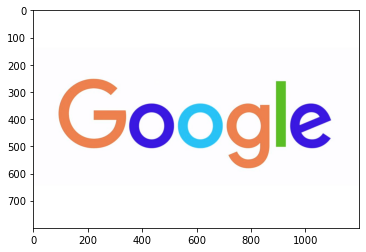

Typ obrazu:  <class 'numpy.ndarray'>
Wymiary obrazu:  (800, 1200, 3)


In [38]:
# importuje wz
import cv2
import numpy as np
import matplotlib.pyplot as plt

# funkcja magiczna umozliwia wyswietlanie rysunku w notatniku
%matplotlib inline

#wczytuje obraz za pomoca funkcji cv2.imread()
image = cv2.imread("data/img/google.jpeg")

#wyswietlam obraz
plt.imshow(image)
plt.show()

#Sprawdzam wymiary obrazy i typ
print("Typ obrazu: ", type(image))
print("Wymiary obrazu: ", image.shape)

##### W powyzszym listingu otrzymialem rysunek z niewlaciwymi kolorami firmy Google. Wynika to z tego , ze funckja `cv2.imread()` wczytuje obrazy w modelu barw BGR.  Przekrztalcam go w model RGB za pomoca funkcji `cv2.cvtColor()`  z flaga `(image,cv2.COLOR_BGR2RGB`)

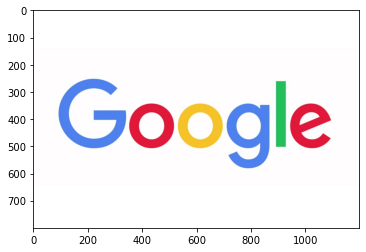

In [23]:
#przeksztalcam przestrzen barw obrazu z modelu BGR w RGB
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.show()

In [33]:
#Zapisuje obraz
cv2.imwrite('image.jpg',rgb_image)

True

### Rysowanie na obrazach
___

`fill()` - przypisuje dana wartosc do wszystkich elementow macierzy

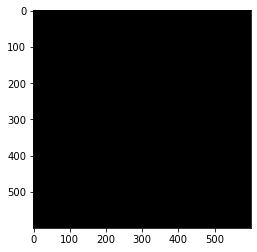

In [116]:
#tworze czarny obraz
image_shape = (600,600,3)
black_image = np.zeros(shape = image_shape, dtype = np.int16)

plt.imshow(black_image)

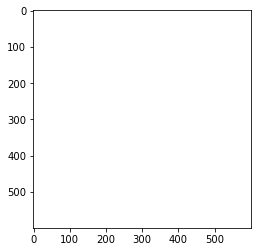

In [65]:
#tworze bialy obraz
image_shape = (600,600,3)
white_image = np.zeros(shape = image_shape, dtype = np.int16)

#wyznaczam wartosc 255 kazdego piksela obrazu
white_image.fill(255)

plt.imshow(white_image)

##### `cv2.line()` - sluzy do rysowania linii ma obrazie
>* (599,0) - koordynata x1, y1
>* (0,599) - koordynata x2, y2
>* (255,0,0) - color rgb
>* 10 - grubosc lini

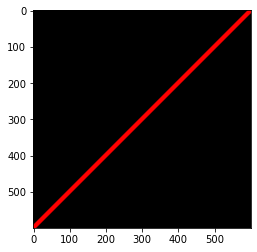

In [118]:
#rysuje linie na czarnym obrazie
line = cv2.line(black_image,(599,0),(0,599),(255,0,0),10)

plt.imshow(line)

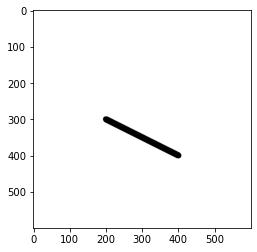

In [121]:
#rysuje linie na bialym obrazie
line = cv2.line(white_image,(200,300),(400,400),(0,0,0),15)

plt.imshow(line)

##### `cv2.circle()` - sluzy do rysowania kola ma obrazie
>* (300,300) - koordynata x,y promieia 
>* (280) - dlugosc promienia w pikselach
>* (255,0,0) - color rgb
>* 15 - grubosc lini

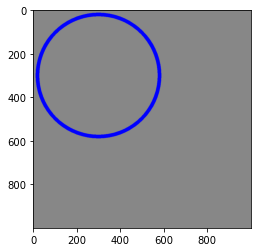

In [152]:
#rysuje okrag na szarym rynunku
image_shape = (1000,1000,3)

gray_image = np.zeros(shape=image_shape,dtype = np.int16)
gray_image.fill(135)

circle = cv2.circle(gray_image,(300,300),(280),(0,0,255),15)


plt.imshow(gray_image)

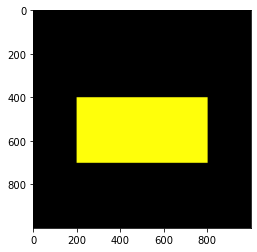

In [6]:
#rysuje prostakat na czarnym obrazie
image_shape = (1000,1000,3)
black_image = np.zeros(shape = image_shape, dtype = np.int16)
plt.imshow(black_image)

rectangle = cv2.rectangle(black_image,(200,400), (800,700), (255,255,10),-1)

plt.imshow(rectangle)

###  Pisanie na obrazach 
___
`cv2.putText()`- umozliwia tworzenia tekstu na obrazach

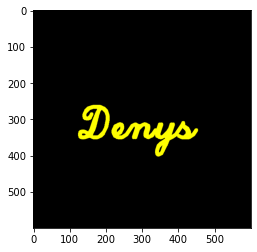

In [50]:
image_shape = (600,600,3)
black_image = np.zeros(shape = image_shape, dtype = np.int16)

text = cv2.putText(
                    black_image, # na jakim rysnuku chce umiescic tekst
                    'Denys', # wlasnie sam tekst
                    (125,350), # poczatek tekstu (x,y)
                    cv2.FONT_HERSHEY_SCRIPT_COMPLEX, # styl tekstu
                    4, # rozmiar tekstu
                    (255,255,0), # kolor teksty
                    10, # grubosc teksty
                    cv2.LINE_8), # w typ linii

plt.imshow(black_image)

### Zmiana rozmiaru obrazu
___
`cv2.resize()` - zmieniam rozmiar obrazu 

**Interpolacja sluzy do unikania efektu mory podczas skalowania obrazow**

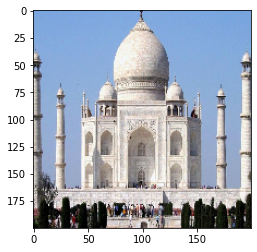

In [66]:
#wczytuje obraz
image = cv2.imread("data/img/tajmahal.jpeg")

#przeksztalcam przestrzen barw z BGR do RGB
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


#zmieniam rozmiar obrazu
image_resized = cv2.resize(rgb_image, (200,200)) 


interpolation = cv2.INTER_NEAREST

%matplotlib inline
plt.imshow(image_resized)



### Przekszatalcenie izometryczne obrazow
___
pozwala uzyskac jego lustrzane odbicie

`cv2.flip()`- sluzy do pzekszalcania izometrycznie obrazu
> * kod > 0 oznacza obrot w pionie 
> * kod = 0 oznacza obrot w poziomie 
> * kod < 0 oznacza obrot w obydwu osiach 

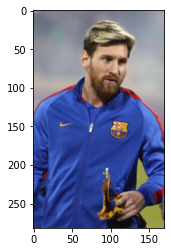

In [76]:
#wczytuje obraz messi
image = cv2.imread('data/img/messi.png')
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

%matplotlib inline
plt.imshow(rgb_image)

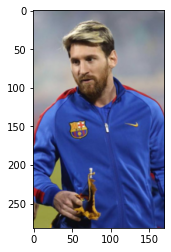

In [87]:
#przeksztalcam izometrycznie obraz w pozimie (kod > 0)
image_flip_poziomie = cv2.flip(rgb_image,1)

plt.imshow(image_flip_poziomie)

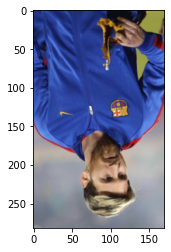

In [81]:
#przeksztalcam izometrycznie obraz w pionie (kod = 0)
image_flip_pionie = cv2.flip(rgb_image,0)
plt.imshow(image_flip_pionie)

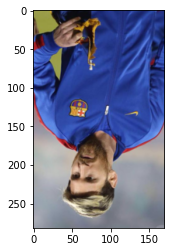

In [84]:
#przeksztalcam izometrycznie obraz w poziomie i w pionie (kod < 0)
image_flip = cv2.flip(rgb_image, -1)
plt.imshow(image_flip)

### Zmiana jasnosci obrazu:
___
`cv2.addWeighted()` - dolaczylismy dwie macierze o zadanej wadze : alfa i beta

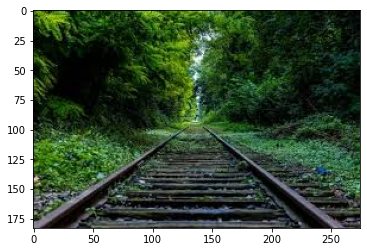

In [93]:
image = cv2.imread("data/img/nature.jpeg")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

%matplotlib inline 
plt.imshow(rgb_image)

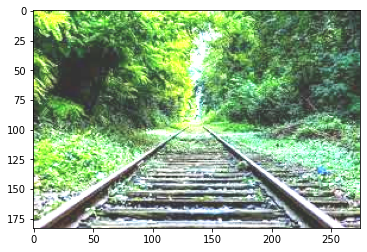

In [122]:
#Zmieniam jasnosc obrazu:
alpha_ = 2
gamma_ = 0
beta_ = 50

image_change=cv2.addWeighted(
                            rgb_image, # rysunek jaki zmieniam
                            alpha_, # alpha zawiera wage macierze
                            np.zeros(image.shape,image.dtype), # macierz pusta
                            gamma_, # gamma
                            beta_ # beta
)

plt.imshow(image_change)

### Rozmywanie obrazu
___
`cv2.blur()` - sluzy do rozmywanie obrazu

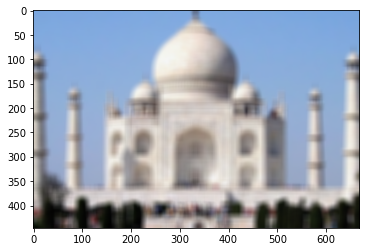

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

image = cv2.imread("data/img/tajmahal.jpeg")
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image_blur = cv2.blur(rgb_image,(15,15))
plt.imshow(image_blur)

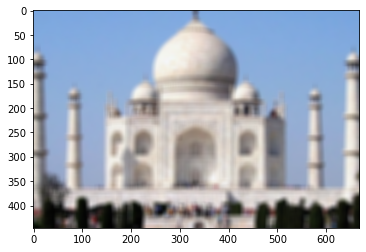

In [31]:
#rozmywanie gaussowskiego (obydwie liczbym musza byc parzyste)
image_blur_gaussian = cv2.GaussianBlur(rgb_image,(13,13),9)
plt.imshow(image_blur_gaussian)

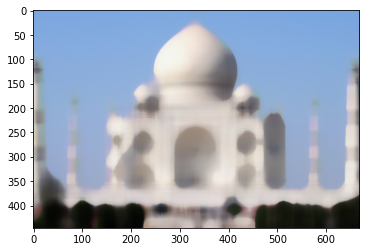

In [44]:
#rozmywanie medianowe (rozmiar jadra byl liczba nie parzysta)
image_blur_median = cv2.medianBlur(rgb_image, 31)
plt.imshow(image_blur_median)

### Wykrywanie twarzy
___

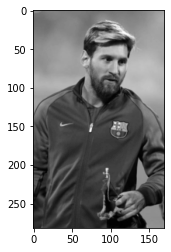

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

image = cv2.imread("data/img/messi.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(image_gray, cmap = 'gray')

1) Wczytuje plik kaskadowego klasyfikatora twarzy Haara:

In [53]:
# 1) Wczytuje plik kaskadowego klasyfikatora twarzy Haara:
haar_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

In [58]:
# 2) Uzyskuje wspolrzedne wszystkich twarzy wystepujacych na obrazie:
faces_cordinates = haar_cascade.detectMultiScale(image_gray,scaleFactor = 1.3, minNeighbors = 7)

In [74]:
# 3) Rysuje prostokat wokol wykrytych twarzy:
for (p,q,r,s ) in faces_cordinates:
    cv2.rectangle(image,(p,q), (p+r, q+s), (0,255,0),1)

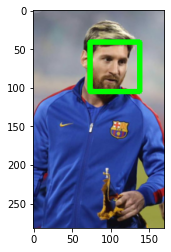

In [75]:
# 4) Przekszatlcam model BGR w model RGB
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

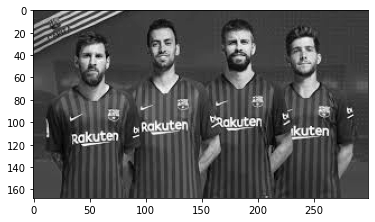

In [81]:
image = cv2.imread("data/img/barcelona.jpeg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap = 'gray')

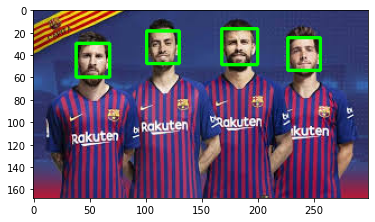

In [85]:
haar_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")
faces_cordinates = haar_cascade.detectMultiScale(image_gray, scaleFactor = 1.3, minNeighbors = 5)

for (x1,y1,x2,y2) in faces_cordinates:
    cv2.rectangle(image, (x1,y1),(x1+x2,y1+y2),(0,255,0),2)
    
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

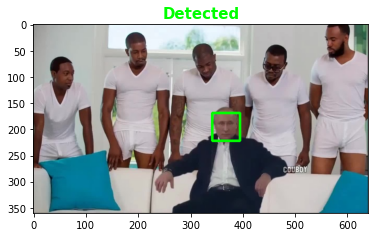

In [151]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Detected", color = 'lime', fontsize= 15, fontweight='bold')

image = cv2.imread("data/img/meme.jpeg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

haar_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")
faces_cordinates = haar_cascade.detectMultiScale(image, scaleFactor = 1.3, minNeighbors = 5)
for (x1,y1,x2,y2) in faces_cordinates:
    
    cv2.rectangle(image, (x1,y1), (x1+x2,y1+y2),(0,255,0),3)
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)